In [34]:
%matplotlib inline
import pandas as pd

In [35]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [36]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [37]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [83]:
man=cast[(cast.character=="Batman")|(cast.character=="Superman")].groupby(['character','year']).size()
man=man.reset_index()
man=pd.pivot_table(man,index='year',columns="character",values=0,aggfunc=sum)
man['SY']=man['Superman']-man['Batman']
len(man[man['SY']>0])

2

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [85]:
man=cast[(cast.character=="Batman")|(cast.character=="Superman")].groupby(['character','year']).size()
man=man.reset_index()
man=pd.pivot_table(man,index='year',columns="character",values=0,aggfunc=sum)
man['BY']=man['Batman']-man['Superman']
len(man[man['BY']>0])

7

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

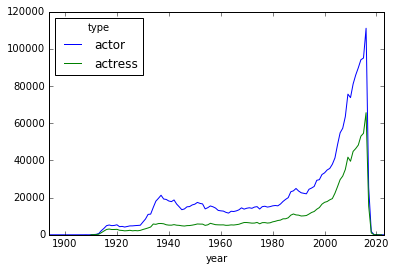

In [127]:
typ=typ=cast.groupby(['type','year']).size()
typ=typ.reset_index()
typ.fillna(0,inplace=True)
pd.pivot_table(typ,index='year',columns='type',values=0,aggfunc=sum).plot(kind='line')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

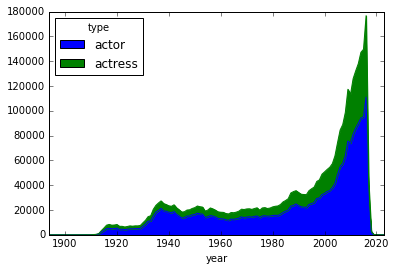

In [128]:
typ=typ=cast.groupby(['type','year']).size()
typ=typ.reset_index()
typ.fillna(0,inplace=True)
pd.pivot_table(typ,index='year',columns='type',values=0,aggfunc=sum).plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

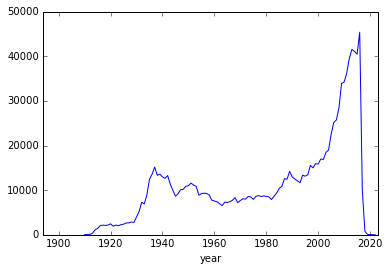

In [130]:
typ=typ=cast.groupby(['type','year']).size()
typ=typ.reset_index()
typ.fillna(0,inplace=True)
typ=pd.pivot_table(typ,index='year',columns='type',values=0,aggfunc=sum)
typ['different']=typ['actor']-typ['actress']
typ['different'].plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

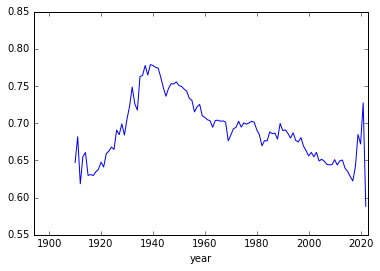

In [133]:
typ=typ=cast.groupby(['type','year']).size()
typ=typ.reset_index()
typ.fillna(0,inplace=True)
typ=pd.pivot_table(typ,index='year',columns='type',values=0,aggfunc=sum)
typ['fraction_actor']=typ['actor']/(typ['actor']+typ['actress'])
typ['fraction_actor'].plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

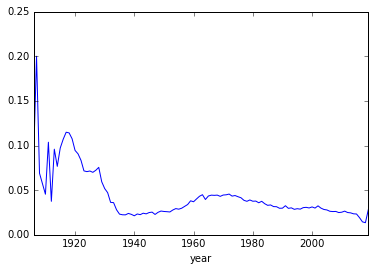

In [165]:
main=cast[cast.type=='actor'].groupby(['year']).size()
main=main.reset_index()
n=cast[(cast.n==2)&(cast.type=='actor')].groupby('year').size()
n=n.reset_index()
x=pd.merge(main,n,left_on='year',right_on='year')
x=x.set_index('year')
x['fraction_n']=x['0_y']/x['0_x']
x['fraction_n'].plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

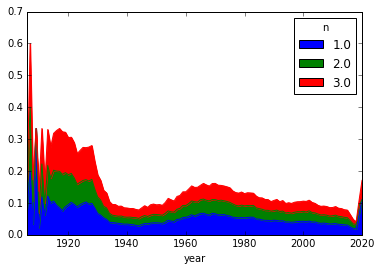

In [187]:
main=cast[cast.type=='actor'].groupby(['year']).size()
main=main.reset_index()
n=cast[((cast.n==1)|(cast.n==2)|(cast.n==3))&(cast.type=='actor')].groupby(['year','n']).size()
n=n.reset_index()
x=pd.merge(main,n,left_on='year',right_on='year')
x=x.reset_index()
x['fraction']=x["0_y"]/x['0_x']
x=pd.pivot_table(x,index='year',columns='n',values='fraction').fillna(0)
x.plot(kind="area")